# Model comparison

In [111]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt

In [112]:
F = len("Michał")
L = len("Święciło")
N = (F + L) * 100

### Exercise 1 - data generation

In [113]:
# Compilation of code_1.stan and data generation
model1 = CmdStanModel(stan_file='code_1.stan')
data1 = model1.sample(data={"N" : N},
                      iter_sampling=1,
                      iter_warmup=0,
                      chains=1,
                      fixed_param=True)

# Conversion to dataframe without unnecessary data
df1 = data1.draws_pd().iloc[0, 3:]
display(df1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


y[1]       0.608475
y[2]       0.457153
y[3]      -0.561570
y[4]      -1.734860
y[5]      -0.024456
             ...   
y[1396]   -1.328140
y[1397]    2.162300
y[1398]   -1.035830
y[1399]   -0.847487
y[1400]    0.289646
Name: 0, Length: 1400, dtype: float64

In [114]:
# Compilation of code_2.stan and data generation
model2 = CmdStanModel(stan_file='code_2.stan')
data2 = model2.sample(data={"N" : N},
                      iter_sampling=1,
                      iter_warmup=0,
                      chains=1,
                      fixed_param=True)

# Conversion to dataframe without unnecessary data
df2 = data2.draws_pd().iloc[0, 3:]
display(df2)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


X[2,1]    -0.174944
X[3,1]     0.776660
X[4,1]    -0.375557
X[5,1]    -1.981330
X[6,1]    -1.701910
             ...   
y[1396]    1.201740
y[1397]   -1.046060
y[1398]    0.418949
y[1399]    1.630420
y[1400]    1.573620
Name: 0, Length: 7002, dtype: float64

### Exercise 2 - comparison of normal and student models for data from first file

In [115]:
# Compilation of code_3.stan
model3 = CmdStanModel(stan_file='code_3.stan')
data3 = model3.sample(data={"N": N, "y" : df1})
az_data3 = az.from_cmdstanpy(data3)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)



chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [116]:
# Compilation of code_4.stan
model4 = CmdStanModel(stan_file='code_4.stan')
data4 = model4.sample(data={"N" : N, "y" : df1})
az_data4 = az.from_cmdstanpy(data4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


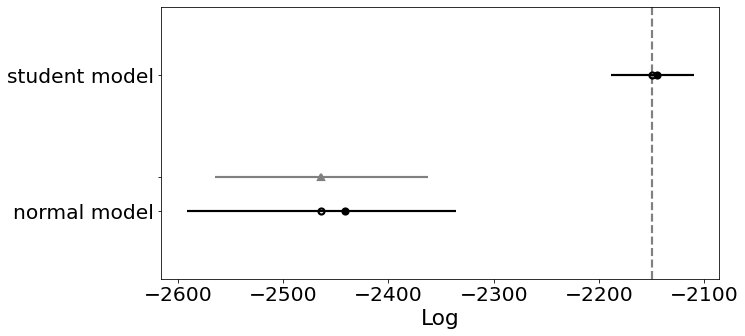

In [117]:
# loo comparison
loo_compare = az.compare({"normal model" : az_data3, "student model" : az_data4}, ic="loo")
az.plot_compare(loo_compare, figsize=(10, 5))
plt.show()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


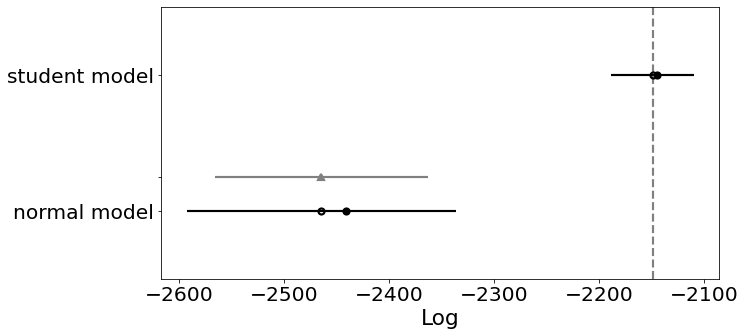

In [118]:
# waic comparison
loo_compare = az.compare({"normal model" : az_data3, "student model" : az_data4}, ic="waic")
az.plot_compare(loo_compare, figsize=(10, 5))
plt.show()

### Exercise 3 - comparison of models with different numbers of predictors

In [119]:
# Compilation of code_5.stan
model5 = CmdStanModel(stan_file='code_5.stan')

y = np.array(df2[:N])
X_part = np.array(df2[N:2*N])

# Sample data from predictor 1
pred1 = model5.sample(data={"N" : N,
                              "K" : 1,
                              "y" : y,
                              "X" : X_part.reshape(N, 1)
                              })
az_pred1 = az.from_cmdstanpy(pred1)

# Sample data from predictor 2
pred2 = model5.sample(data={"N" : N,
                              "K" : 2,
                              "y" : y,
                              "X" : np.concatenate((X_part, X_part)).reshape(N, 2)
                              })
az_pred2 = az.from_cmdstanpy(pred2)

# Sample data from predictor 3
pred3 = model5.sample(data={"N" : N,
                              "K" : 3,
                              "y" : y,
                              "X" : np.concatenate((X_part, X_part, X_part)).reshape(N, 3)
                              })
az_pred3 = az.from_cmdstanpy(pred3)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)





chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)




chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed            

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)




chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


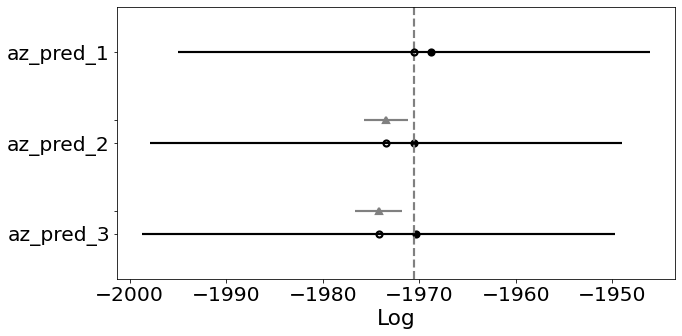

In [120]:
# loo comparison
loo_compare = az.compare({"az_pred_1" : az_pred1, "az_pred_2" : az_pred2, "az_pred_3" : az_pred3}, ic="loo")
az.plot_compare(loo_compare, figsize=(10, 5))
plt.show()

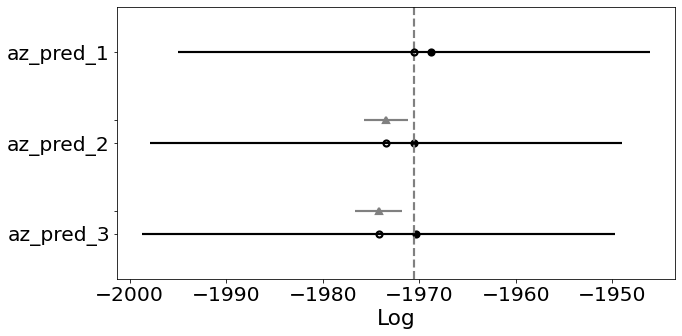

In [121]:
# waic comparison
loo_compare = az.compare({"az_pred_1" : az_pred1, "az_pred_2" : az_pred2, "az_pred_3" : az_pred3}, ic="waic")
az.plot_compare(loo_compare, figsize=(10, 5))
plt.show()